In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [41]:
data = pd.read_csv('survey_lung_cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [42]:
data = data.sample(frac=1).reset_index(drop=True)

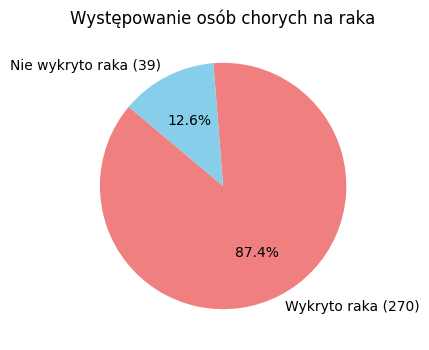

In [26]:
# WYKRES KOŁOWY Z LICZBĄ OSÓB CHORYCH I NIECHORYCH
cancer_counts = data['LUNG_CANCER'].value_counts()

# liczba osób chorych
count_yes = cancer_counts['YES']

# liczba osób niechorych
count_no = cancer_counts['NO']

# wykres kołowy
plt.figure(figsize=(4, 4))
plt.pie([count_yes, count_no], labels=['Wykryto raka ({})'.format(count_yes), 'Nie wykryto raka ({})'.format(count_no)],autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Występowanie osób chorych na raka')
plt.show()


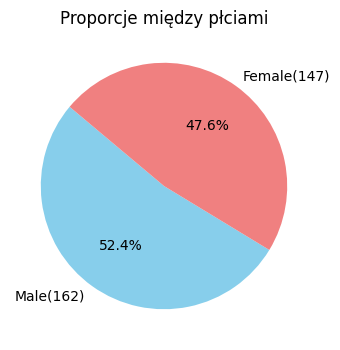

In [8]:
# WYKRES KOŁOWY Z LICZBĄ MEŻCZYZN I KOBIET
sex_counts = data['GENDER'].value_counts()
# liczba męzczyzn
counts_male = sex_counts['M']
# liczba kobiet
counts_female = sex_counts['F']

# wykres kołowy
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=['Male({})'.format(counts_male), 'Female({})'.format(counts_female)], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporcje między płciami')
plt.show()

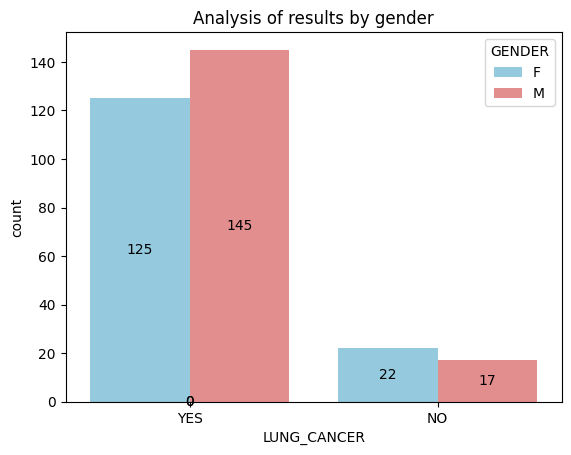

In [27]:
# TWORZENIE WYKRESU OSÓB CHORYCH I ZDROWYCH Z PODZIAŁEM NA PŁCIE
ax = sns.countplot(data=data, x='LUNG_CANCER', palette=['#87CEEB', '#F08080'], hue='GENDER')
ax.set_title("Analysis of results by gender")

# dodawanie wartości liczbowych na słupkach
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height / 2), 
                ha='center', va='center')

plt.show()

KeyError: 'FATIGUE'

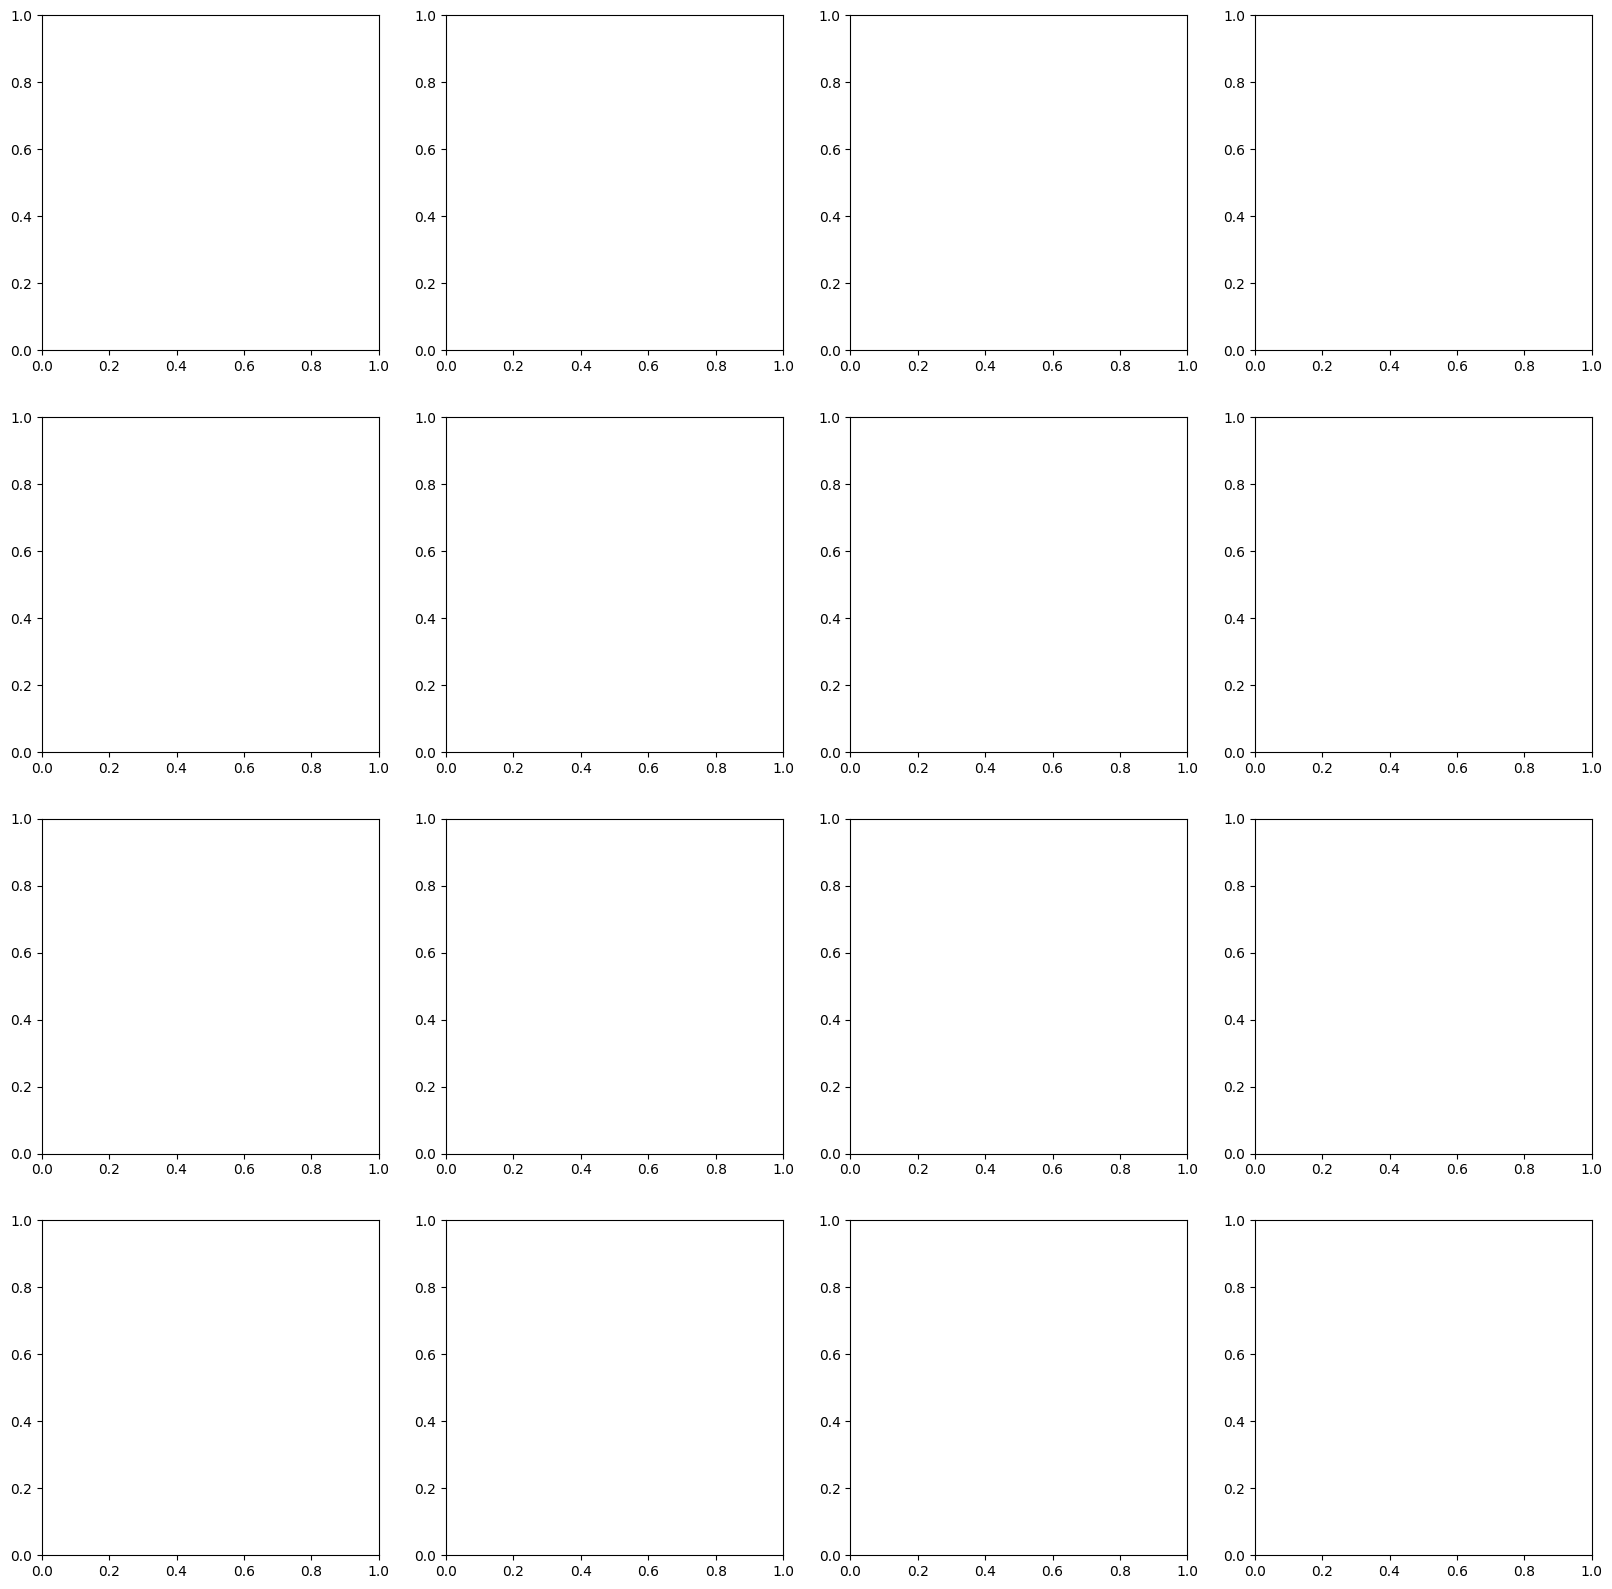

In [28]:
# PORÓWNYWANIE CECH/OBJAÓW NA WYSTĘPOWANIE RAKA PŁUC
def plot_comparisons_seaborn(data, feature, ax):
    
    data = data.copy()
    data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 'Rak Płuc', 'NO': 'Brak raka płuc'})
    data[feature] = data[feature].map({1:'NO', 2:'YES'})
    # Wykres
    sns.countplot(data=data, x=feature, hue='LUNG_CANCER', palette='Set2', ax=ax, order = ['YES','NO'])
    ax.set_title(f'{feature.replace("_", " ").title()} a występowanie raka płuc')
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel('Liczba Osób')
    ax.legend(title='Lung Cancer')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height / 2),
                    ha='center', va='center', fontsize=10, color='black')

        

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

features = ["FATIGUE", "ALCOHOL CONSUMING", "SMOKING", "YELLOW_FINGERS", "ANXIETY",
            "PEER_PRESSURE", "CHRONIC DISEASE", "ALLERGY", "WHEEZING", "COUGHING", 
            "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]


for i, feature in enumerate(features):
    row = i // 4 
    col = i % 4   
    plot_comparisons_seaborn(data, feature, ax=axs[row, col])
# usuwanie 3 "pustych" wykresow
for i in range(13, 16):
    row = i // 4
    col = i % 4
    fig.delaxes(axs[row, col])

plt.tight_layout()  #odstepy
plt.show()

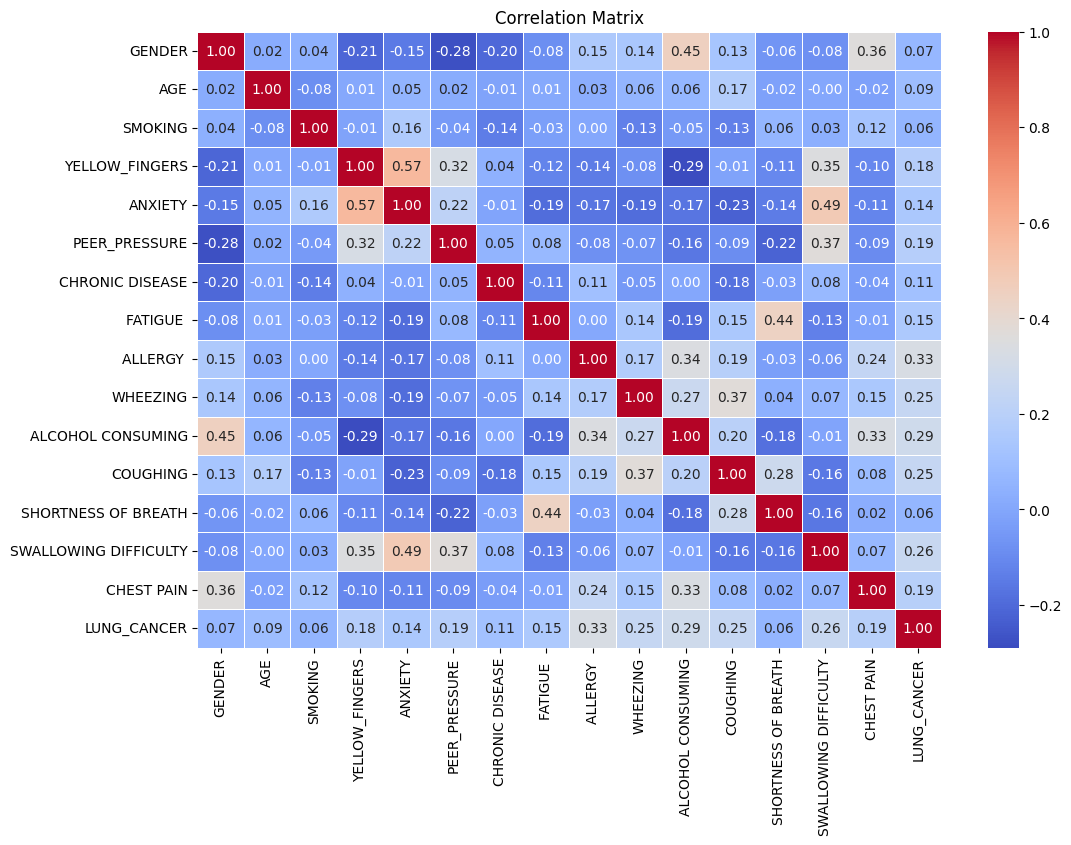

In [44]:
# MAPA KORELACJI
# zamiana wartości YES/NO na 1/0 
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# zamiana wartości M/F na 1/0
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
def create_classifier_test(classifier, classifier_name: str):
    def test(data):
        accuracy_table = []
        conf_matrix_sum = np.zeros((2, 2))
        best_accuracy = 0

        for _ in range(0, 500):
            x = data.iloc[:, 1:-1]
            y = data.iloc[:, -1]
            random_state = np.random.randint(0, 10000)
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred) * 100
            accuracy_table.append(accuracy)
            conf_matrix_sum += confusion_matrix(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_conf_matrix = confusion_matrix(y_test, y_pred)
                
        mean_accuracy = round(np.mean(accuracy_table), 2)
        std_accuracy = round(np.std(accuracy_table), 2)
        mean_conf_matrix = (conf_matrix_sum / 500).astype(int)
        print(f"Accuracy {classifier_name} is = {mean_accuracy}% and standard deviation: {std_accuracy}")
        return best_conf_matrix, mean_conf_matrix, mean_accuracy 
    
    return test

In [33]:
GaussianNaiveBayes = create_classifier_test(GaussianNB(), "Naive Bayess (Gauss)")
MultinomialNaiveBayes = create_classifier_test(MultinomialNB(), "Naive Bayes (Multinomial)")
DecisionTree = create_classifier_test(DecisionTreeClassifier(), "Decision Tree")

def KNN(k: int) :
    return create_classifier_test(KNeighborsClassifier(n_neighbors=k), f"KNN (k={k})")

In [34]:
# wizualizacja macierzy błędów
def draw_conf_matrix(data):
    conf_matrix = data
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('KNN Confusion Matrix')
    plt.show()
    
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    recall = TP / (TP + TN)
    precision = TP / (TP + FP)
    F1 = (precision * recall) / (precision + recall)
    specificity = TN / (TN + FP)
    
    print(f'Accuracy is: {accuracy:.2f}%')
    print(f'Recall is: {recall:.2f}%')
    print(f'Precision is: {precision:.2f}%')
    print(f'F1 is: {F1:.2f}%')
    print(f'Specificity is: {specificity:.2f}%')


In [27]:
knn_accuracies = {k: [] for k in range(2, 6)}
gnb_accuracies = []
mnb_accuracies = []
dt_accuracies = []

for _ in range(0, 5):
    for k in range(2, 6):
        knn_accuracies[k].append(KNN(k)(data)[2])
    gnb_accuracies.append(GaussianNaiveBayes(data)[2])
    mnb_accuracies.append(MultinomialNaiveBayes(data)[2])
    dt_accuracies.append(DecisionTree(data)[2])


Accuracy KNN (k=2) is = 83.42% and standard deviation: 3.35
Accuracy KNN (k=3) is = 87.7% and standard deviation: 3.12
Accuracy KNN (k=4) is = 86.78% and standard deviation: 2.97
Accuracy KNN (k=5) is = 87.74% and standard deviation: 3.04
Accuracy Naive Bayess (Gauss) is = 89.95% and standard deviation: 3.19
Accuracy Naive Bayes (Multinomial) is = 87.34% and standard deviation: 2.86
Accuracy Decision Tree is = 87.74% and standard deviation: 3.23
Accuracy KNN (k=2) is = 83.09% and standard deviation: 3.36
Accuracy KNN (k=3) is = 87.68% and standard deviation: 2.88
Accuracy KNN (k=4) is = 87.15% and standard deviation: 2.97
Accuracy KNN (k=5) is = 87.83% and standard deviation: 2.97
Accuracy Naive Bayess (Gauss) is = 89.86% and standard deviation: 3.01
Accuracy Naive Bayes (Multinomial) is = 87.22% and standard deviation: 2.79
Accuracy Decision Tree is = 87.62% and standard deviation: 3.26
Accuracy KNN (k=2) is = 83.32% and standard deviation: 3.39
Accuracy KNN (k=3) is = 87.66% and stan

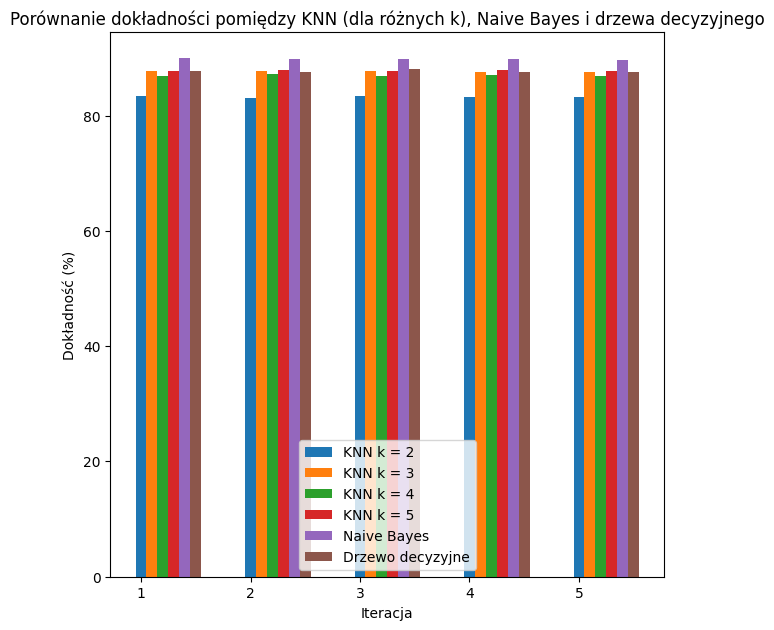

In [28]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 3)
for k in range(2, 6):
    plt.bar([x + (k-2)*0.1 for x in range(1, 6)], knn_accuracies[k], width=0.1, label=f'KNN k = {k}')
plt.bar([x + 0.4 for x in range(1, 6)], gnb_accuracies, width=0.1, label='Naive Bayes')
plt.bar([x + 0.5 for x in range(1, 6)], dt_accuracies, width=0.1, label='Drzewo decyzyjne')
plt.xlabel('Iteracja')
plt.ylabel('Dokładność (%)')
plt.title('Porównanie dokładności pomiędzy KNN (dla różnych k), Naive Bayes i drzewa decyzyjnego')
plt.legend()
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

Accuracy Naive Bayess (Gauss) is = 89.68% and standard deviation: 3.02


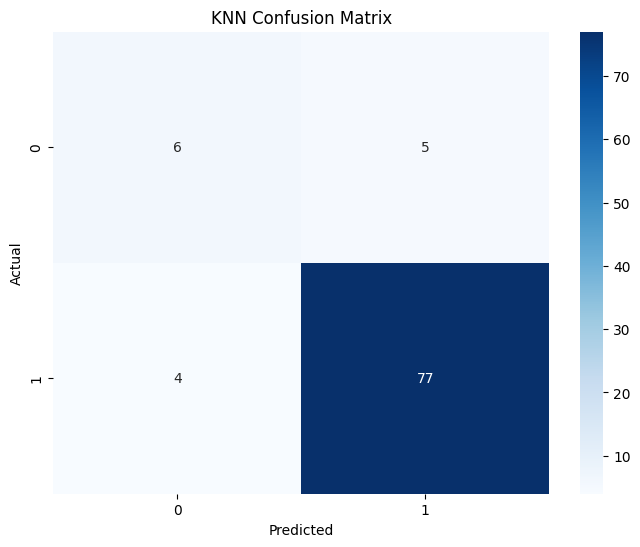

Accuracy is: 0.90%
Recall is: 0.93%
Precision is: 0.94%
F1 is: 0.47%
Specificity is: 0.55%


In [35]:
#macierz błędów dla 500 prób
_, matrix_to_draw_mean, _ = GaussianNaiveBayes(data)
draw_conf_matrix(matrix_to_draw_mean)  # srednio z 500 prób (lekko inna wartosc, bo zaokraglam dla macierzy błędów)

Accuracy Naive Bayes (Multinomial) is = 87.27% and standard deviation: 2.85


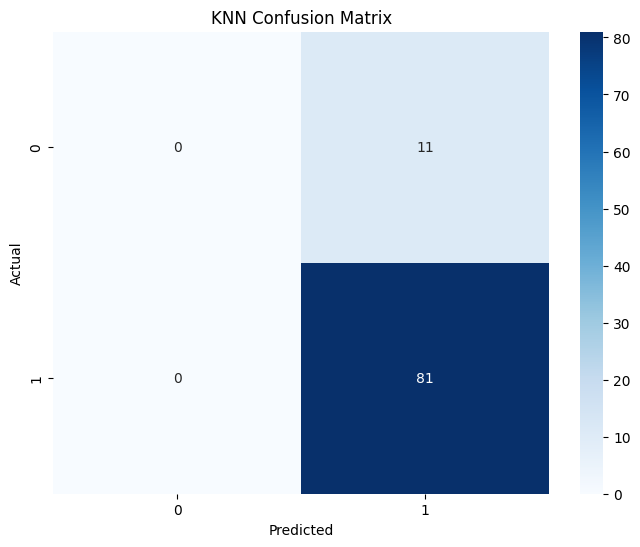

Accuracy is: 0.88%
Recall is: 1.00%
Precision is: 0.88%
F1 is: 0.47%
Specificity is: 0.00%


In [36]:
#macierz błędów dla 500 prób
_, matrix_to_draw_mean, _ = MultinomialNaiveBayes(data)
draw_conf_matrix(matrix_to_draw_mean)  # srednio z 500 prób (lekko inna wartosc, bo zaokraglam dla macierzy błędów)

Accuracy Decision Tree is = 88.08% and standard deviation: 3.38


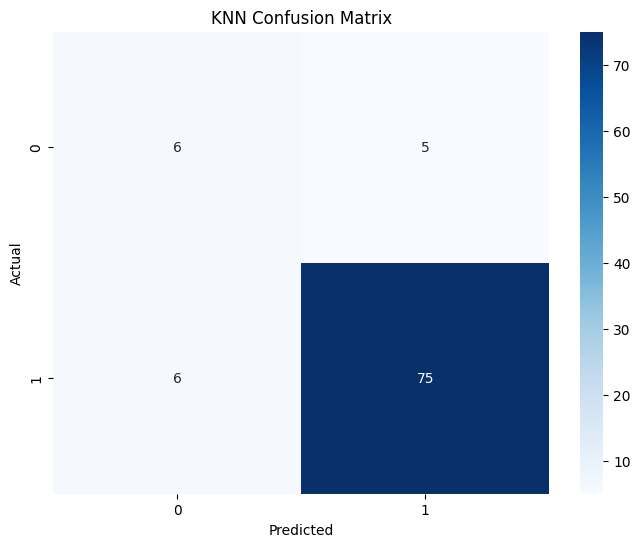

Accuracy is: 0.88%
Recall is: 0.93%
Precision is: 0.94%
F1 is: 0.47%
Specificity is: 0.55%


In [43]:
#macierz błędów dla 500 prób
_, matrix_to_draw_mean, _ = DecisionTree(data)
draw_conf_matrix(matrix_to_draw_mean)  # srednio z 500 prób (lekko inna wartosc, bo zaokraglam dla macierzy błędów)

Accuracy KNN (k=5) is = 87.88% and standard deviation: 3.09


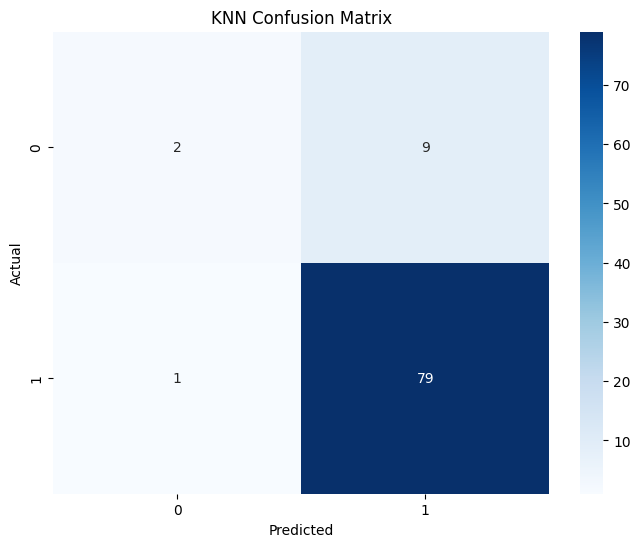

Accuracy is: 0.89%
Recall is: 0.98%
Precision is: 0.90%
F1 is: 0.47%
Specificity is: 0.18%


In [38]:
#macierz błędów dla 500 prób
_, matrix_to_draw_mean, _ = KNN(5)(data)
draw_conf_matrix(matrix_to_draw_mean)  # srednio z 500 prób (lekko inna wartosc, bo zaokraglam dla macierzy błędów)

In [ ]:
column_names = [*data.columns]
column_names.remove("LUNG_CANCER")
drop_column_accuracies = {}

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn
for col in column_names:
    drp = [col]
    print(f"Po usunięciu {drp}")
    _,_, mean_accuracy = GaussianNaiveBayes(data.drop(drp, axis='columns'))
    drop_column_accuracies[col] = mean_accuracy

In [ ]:
def drop_test_bayes(to_drop: list[str]):
    for col in column_names:
        if col in to_drop:
            continue
        drp = [*to_drop, col]
        print(f"Po usunięciu {drp}")
        GaussianNaiveBayes(data.drop(drp, axis='columns'))   

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + ALCOHOL CONSUMING
drop_test_bayes(['ALCOHOL CONSUMING'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + ALCOHOL CONSUMING
drop_test_bayes(['ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + ALCOHOL CONSUMING + AGE
drop_test_bayes(['ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY', 'AGE'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + ALCOHOL CONSUMING + AGE + SMOKING
drop_test_bayes(['ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY', 'AGE', 'SMOKING'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + WHEEZING
drop_test_bayes(['WHEEZING'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + 'WHEEZING' + 'SWALLOWING DIFFICULTY'
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + 'WHEEZING' + 'SHORTNESS OF BREATH'
drop_test_bayes(['WHEEZING', 'SHORTNESS OF BREATH'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + 'WHEEZING' + 'AGE'
drop_test_bayes(['WHEEZING', 'AGE'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + 'WHEEZING' + 'SWALLOWING DIFFICULTY' + 'COUGHING'
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY', 'COUGHING'])

In [ ]:
# Sprawdzamy wynik po usunęciu jednej z kolumn + 'WHEEZING' + 'SWALLOWING DIFFICULTY' + 'AGE'
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE'])

In [ ]:
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH'])

In [ ]:
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY', 'COUGHING', 'AGE'])

In [ ]:
drop_test_bayes(['WHEEZING', 'SWALLOWING DIFFICULTY', 'COUGHING', 'AGE', 'SMOKING'])

In [ ]:
best =[
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'COUGHING'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'COUGHING', 'SMOKING'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'COUGHING', 'SMOKING', 'YELLOW_FINGERS'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH', 'YELLOW_FINGERS'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH', 'SMOKING'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH', 'COUGHING'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH', 'COUGHING', 'SMOKING'],
    ['WHEEZING', 'SWALLOWING DIFFICULTY', 'AGE', 'SHORTNESS OF BREATH', 'COUGHING', 'SMOKING', 'YELLOW_FINGERS'],
]

for drp in best:
    print(f"Po usunięciu {drp}")
    matrix_to_draw_best, matrix_to_draw_mean, _ = GaussianNaiveBayes(data.drop(drp, axis='columns'))
    print("Dla najlepszego przypadku z 500 prób")
    draw_conf_matrix(matrix_to_draw_best)  # najlepszy z 500 prób
    print("Dla średniej z 500 prób")
    draw_conf_matrix(matrix_to_draw_mean)  # srednio z 500 prób (wyniki zaokraglone, dlatego lekko inne)
    print()
    print("####################################################################################")
    print()

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.bar(drop_column_accuracies.keys(), drop_column_accuracies.values())
plt.title('Średnie wyniki po usunięciu danego objawu')
plt.xlabel('Objaw')
plt.ylabel('Średnia dokładność (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
